<a href="https://colab.research.google.com/github/erika0915/artificial-intelligence/blob/main/mlp/02_DeepMLP%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep MLP
- 은닉층 6개 (모두 32유닛)
- 활성화 함수 : Sigmoid
- 옵티마이저 : SGD (lr = 0.1)

100%|██████████| 9.91M/9.91M [00:00<00:00, 82.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 29.9MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 66.4MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.91MB/s]


[1/10] Loss: 2.3049
[2/10] Loss: 2.3045
[3/10] Loss: 2.3041
[4/10] Loss: 2.3038
[5/10] Loss: 2.3037
[6/10] Loss: 2.3035
[7/10] Loss: 2.3037
[8/10] Loss: 2.3032
[9/10] Loss: 2.3031
[10/10] Loss: 2.3029

총 학습 시간: 168.06초
Test Loss: 2.3019 | Accuracy: 11.35%


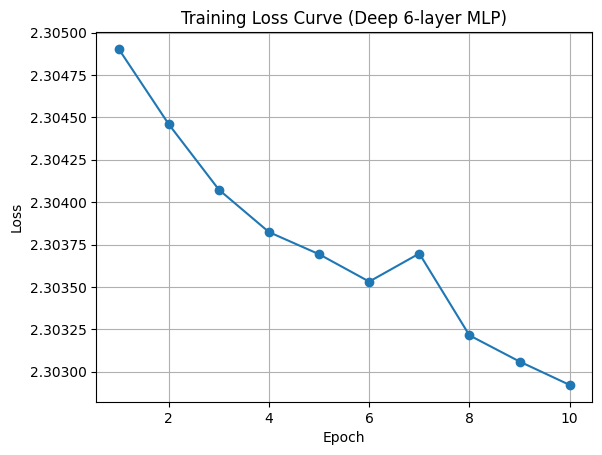

In [1]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. 데이터 전처리 & 로더 (베이스라인과 동일)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset  = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader  = torch.utils.data.DataLoader(testset,  batch_size=1000, shuffle=False)

# 2. 6‑layer(은닉층 6개) MLP 정의  ← 변경
#    - 각 은닉층 유닛 수는 32로 동일
#    - 활성화 함수는 Sigmoid (가이드라인 유지)
class DeepMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.hidden_layers = nn.Sequential(
            nn.Linear(28*28, 32),  nn.Sigmoid(),  # 1
            nn.Linear(32,  32),    nn.Sigmoid(),  # 2
            nn.Linear(32,  32),    nn.Sigmoid(),  # 3
            nn.Linear(32,  32),    nn.Sigmoid(),  # 4
            nn.Linear(32,  32),    nn.Sigmoid(),  # 5
            nn.Linear(32,  32),    nn.Sigmoid()   # 6
        )
        self.out = nn.Linear(32, 10)              # 출력층

    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden_layers(x)
        x = self.out(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DeepMLP().to(device)                      # ← 변경

# 3. 학습 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
epochs = 10
loss_history = []
start_time = time.time()

# 4. 학습
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(trainloader.dataset)
    loss_history.append(epoch_loss)
    print(f'[{epoch+1}/{epochs}] Loss: {epoch_loss:.4f}')

total_time = time.time() - start_time
print(f'\n총 학습 시간: {total_time:.2f}초')

# 5. 테스트 평가
model.eval()
test_loss, correct = 0.0, 0

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        test_loss += criterion(outputs, labels).item() * images.size(0)
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()

test_loss /= len(testloader.dataset)
accuracy  = correct / len(testloader.dataset) * 100
print(f'Test Loss: {test_loss:.4f} | Accuracy: {accuracy:.2f}%')


# 6. 시각화
plt.figure()
plt.plot(range(1, epochs+1), loss_history, marker='o')
plt.title('Training Loss Curve (Deep 6‑layer MLP)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
